#  Laptop Price Analysis - laptop Price Regression
**Author:** PAWAN KHOT  
**Date:** 2025-05-15  

This notebook performs laptop Price Regression on the cleaned laptop dataset.

In [21]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [22]:
#  Load the transformed dataset
df = pd.read_csv("laptop_prices_transformed.csv")
print(" Data loaded:", df.shape)

 Data loaded: (1275, 24)


In [23]:
#  Drop unnecessary column if present
if 'totalstorage' in df.columns:
    df.drop(['totalstorage'], axis=1, inplace=True)

In [24]:
#  Split into features and target
X = df.drop('price_euros', axis=1)
y = df['price_euros']

In [25]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# ...existing code...
#  Split into features and target
X = df.drop('price_euros', axis=1)
y = df['price_euros']

#  Encode categorical features
X = pd.get_dummies(X, drop_first=True)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ...existing code...

In [27]:
# ...existing code...

#  Split into features and target
X = df.drop('price_euros', axis=1)
y = df['price_euros']

#  Encode categorical features
X = pd.get_dummies(X, drop_first=True)

#  Train-test split (do this only once)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#  Predict on test data
y_pred = model.predict(X_test)
# ...existing code...

In [28]:
#  Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" R-squared (R² Score): {r2:.2f}")

 Mean Absolute Error (MAE): 720.02
 Mean Squared Error (MSE): 14485067.87
 Root Mean Squared Error (RMSE): 3805.93
 R-squared (R² Score): -28.18


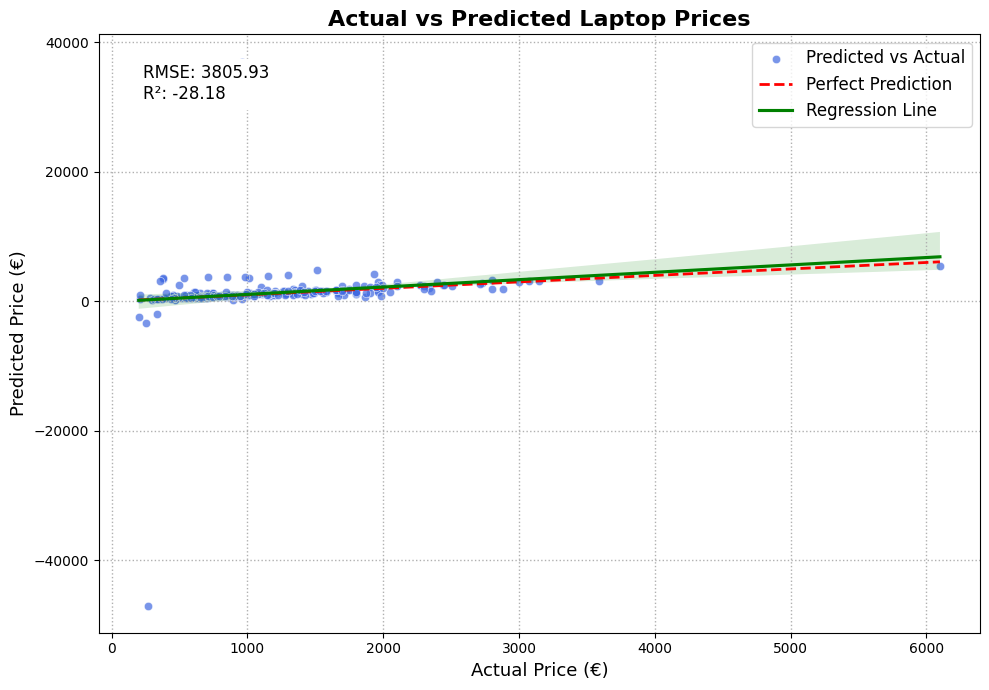

In [30]:
# Enhanced Visualize Actual vs Predicted
plt.figure(figsize=(10, 7))
# Scatter plot with color
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='royalblue', label='Predicted vs Actual')
# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
# Regression line
sns.regplot(x=y_test, y=y_pred, scatter=False, color='green', label='Regression Line')

plt.xlabel("Actual Price (€)", fontsize=13)
plt.ylabel("Predicted Price (€)", fontsize=13)
plt.title("Actual vs Predicted Laptop Prices", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', linewidth=1)
plt.tight_layout()

# Annotate with metrics
plt.annotate(f'RMSE: {rmse:.2f}\nR²: {r2:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, backgroundcolor='white', verticalalignment='top')

plt.show()